# Credit EDA Loan Analysis

In this project we will perform simple Analysis and explore our Data

# Load the Data

# Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None              # By writting this line of code we can see all the columns in the dataset

In [2]:
df = pd.read_csv('application_data.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Perform Data Cleaning and remove all columns containing more than 10 % null values.

In [4]:
# Finding Number of missing values in columns.

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Here s is a Series.

s = df.isnull().sum()                     # pandas.core.series.Series
missing_val = pd.DataFrame(s)             # Converting Series into DataFrame              
missing_val.reset_index(inplace=True)
missing_val

,index,0
0,SK_ID_CURR,0
1,TARGET,0
2,NAME_CONTRACT_TYPE,0
3,CODE_GENDER,0
4,FLAG_OWN_CAR,0
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,41519
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519
119,AMT_REQ_CREDIT_BUREAU_MON,41519
120,AMT_REQ_CREDIT_BUREAU_QRT,41519


In [7]:
# Rename the columns name:-

missing_val.rename(columns={'index' : 'columns', 0: 'missing'},inplace=True)
missing_val

,columns,missing
0,SK_ID_CURR,0
1,TARGET,0
2,NAME_CONTRACT_TYPE,0
3,CODE_GENDER,0
4,FLAG_OWN_CAR,0
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,41519
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519
119,AMT_REQ_CREDIT_BUREAU_MON,41519
120,AMT_REQ_CREDIT_BUREAU_QRT,41519


# Finding 10 Percent

In [8]:
ten = df.shape[0] * 10/100                  # rows
ten

30751.1

In [9]:
tdf = missing_val.loc[missing_val['missing'] > ten]
unwanted_columns = tdf['columns']
unwanted_columns                            # Data in Series

21                      OWN_CAR_AGE
28                  OCCUPATION_TYPE
41                     EXT_SOURCE_1
43                     EXT_SOURCE_3
44                   APARTMENTS_AVG
45                 BASEMENTAREA_AVG
46      YEARS_BEGINEXPLUATATION_AVG
47                  YEARS_BUILD_AVG
48                   COMMONAREA_AVG
49                    ELEVATORS_AVG
50                    ENTRANCES_AVG
51                    FLOORSMAX_AVG
52                    FLOORSMIN_AVG
53                     LANDAREA_AVG
54             LIVINGAPARTMENTS_AVG
55                   LIVINGAREA_AVG
56          NONLIVINGAPARTMENTS_AVG
57                NONLIVINGAREA_AVG
58                  APARTMENTS_MODE
59                BASEMENTAREA_MODE
60     YEARS_BEGINEXPLUATATION_MODE
61                 YEARS_BUILD_MODE
62                  COMMONAREA_MODE
63                   ELEVATORS_MODE
64                   ENTRANCES_MODE
65                   FLOORSMAX_MODE
66                   FLOORSMIN_MODE
67                    LANDAR

In [10]:
# Convert Series data into List to delete these Unwanted columns.

unwanted_columns = list(unwanted_columns)
unwanted_columns                                 # Now unwanted columns in a list

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE

# Delete Unwanted Columns

In [11]:
df = df.drop(columns=unwanted_columns)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial asso

# Finding columns name whose missing values is more than 0.
# Here, we want to keep only AMT_ANNUITY columns and delete all the rest columns

In [12]:
s = df.isnull().sum()
tdf =pd.DataFrame(s)
tdf = tdf.reset_index()
tdf.rename(columns={'index' : 'columns', 0:'missing'}, inplace=True)
fdf = tdf.loc[tdf['missing'] > 0]
unwanted_columns = list(fdf['columns'])
unwanted_columns = unwanted_columns[1:]
unwanted_columns

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [13]:
# Delete all the Above columns from the data set df.

df = df.drop(columns=unwanted_columns)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,3,3,THURSDAY,9,0,0,0,0,1,1,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Delete Columns that Start With Flag except these two columns:-
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY'


In [14]:
columns = list(df.columns)

unwanted_columns = []
for col in columns:
    if col.startswith('FLAG'):
        unwanted_columns.append(col)

unwanted_columns = unwanted_columns[2:]   
unwanted_columns

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
# Drop the unwanted_columns except these two columns named: 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' 

df = df.drop(columns=unwanted_columns)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,2,2,THURSDAY,11,0,0,0,0,1,1,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,THURSDAY,15,0,0,0,0,0,0,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,2,2,MONDAY,8,0,0,0,0,0,0,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,3,3,THURSDAY,9,0,0,0,0,1,1,School
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1


# Necessary Columns

In [16]:
df = df[['SK_ID_CURR', 
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    #'REGION_POPULATION_RELATIVE',
    #'DAYS_BIRTH',
    #'DAYS_EMPLOYED',
    #'DAYS_REGISTRATION',
    #'DAYS_ID_PUBLISH',
    #'REG_REGION_NOT_LIVE_REGION',
    #'REG_REGION_NOT_WORK_REGION',
    #'LIVE_REGION_NOT_WORK_REGION',
    #'REG_CITY_NOT_LIVE_CITY',
    #'REG_CITY_NOT_WORK_CITY',
    #'LIVE_CITY_NOT_WORK_CITY',
    'ORGANIZATION_TYPE'
 ]]

In [17]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,School
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 1


# Outliers- Outliers works on those columns in which there is a drastic change of  values.

* Outliers are data points that significantly differ from the majority of other data points in a dataset.

* These observations are often distant from the central tendency of the data and can have a notable impact on statistical analyses, machine learning algorithms, and data visualizations.

* Outliers can arise due to various reasons, including measurement errors, data corruption, or rare events.

# Types of Outliers:-
lx -> lower extreme (Lower Outlier) Q1 - Quartial 1

ux -> upper extreme (Upper Outlier) Q3 - Quartial 3

iQr -> inter quartial range (Q3-Q1)

Example:-

      Q1 Q2 Q3
data = [30, 45, 70, 95, 100]

In above:-

       45 -> 25 Percentile(%)  Q1

       70 -> 50 Percentile(%)  Q2

       95 -> 75 Percentike(%)  Q3

# Interquartiel Range - iQr (Q3-Q1)
Note:-
Most of the data are always lies between 25 Percentile(%) to 75 Percentile(%).

# Formula to find lx(lower Outlier):-
lx = Q1 - 1.5 * iQr

# Formula to find ux(Upper Outlier):-
ux = Q3 + 1.5 * iQr

# Find Outliers on AMT_INCOME_TOTAL column.

In [18]:
df[['AMT_INCOME_TOTAL']]

,AMT_INCOME_TOTAL
0,202500.0
1,270000.0
2,67500.0
3,135000.0
4,121500.0
...,...
307506,157500.0
307507,72000.0
307508,153000.0
307509,171000.0


In [19]:
import numpy as np
Q1,Q2,Q3 = np.percentile(df['AMT_INCOME_TOTAL'], [25, 50, 75])
print(f'Q1: {Q1}')
print(f'Q2: {Q2}')
print(f'Q3: {Q3}')

iQr = Q3-Q1
print(f'iQr: {iQr}')

Q1: 112500.0
Q2: 147150.0
Q3: 202500.0
iQr: 90000.0


In [20]:
# Find the Lower Outlier of 'AMT_INCOME_TOTAL' column

lx = Q1 - 1.5 * iQr
print(f'lx= {lx}')      # if 'AMT_INCOME_TOTAL' is less than -22500.0 is Outlier

# Find the Upper Outlier of 'AMT_INCOME_TOTAL' column

ux = Q3 + 1.5 * iQr
print(f'ux= {ux}')      # if 'AMT_INCOME_TOTAL' is greater than 337500.0 is Outlier

lx= -22500.0
ux= 337500.0


In [21]:
df = df.loc[df['AMT_INCOME_TOTAL'] < ux]
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,School
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 1


In [22]:
# The average of Loan Applicant Salary.

df['AMT_INCOME_TOTAL'].mean() 

153139.46459115282

# Find Percentage of Approved and Refused  Loan Application

# Load previous_application csv file.

In [23]:
prev_df = pd.read_csv(r'previous_application.csv')
prev_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [24]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,School
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 1


In [25]:
# SK_ID_CURR column values are same of prev_df ==  SK_ID_CURR column values of df

prev_df.loc[prev_df['SK_ID_CURR'] == 100002]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.0,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0


In [26]:
prev_df = prev_df[['SK_ID_CURR', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON']]
prev_df

,SK_ID_CURR,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
0,271877,Approved,XAP
1,108129,Approved,XAP
2,122040,Approved,XAP
3,176158,Approved,XAP
4,202054,Refused,HC
...,...,...,...
1670209,352015,Approved,XAP
1670210,334635,Approved,XAP
1670211,249544,Approved,XAP
1670212,400317,Approved,XAP


# Merge df  with prev_df  on the bases of SK_ID_CURR column using inner join rename dataset named: ndf

In [27]:
ndf = df.merge(prev_df, on='SK_ID_CURR')
ndf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339281,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP
1339282,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Refused,HC
1339283,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Refused,HC
1339284,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP


# From here we use dataset named: ndf

# Drop duplicate rows.

In [28]:
# Find duplicate rows.

duplicates = ndf[ndf.duplicated()]
duplicates

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339280,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP
1339281,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP
1339283,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Refused,HC
1339284,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP


In [29]:
# Convert duplicate rows index into list.

rows_len = duplicates.shape[0]   # 817951

                      # For index 
row_deleted = list(duplicates.index[np.arange(0, rows_len, 1)])
row_deleted

[2,
 3,
 7,
 8,
 9,
 10,
 11,
 12,
 15,
 16,
 17,
 18,
 19,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 34,
 35,
 37,
 38,
 41,
 44,
 45,
 46,
 48,
 50,
 51,
 52,
 55,
 57,
 58,
 59,
 60,
 61,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 77,
 81,
 82,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 95,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 120,
 122,
 123,
 124,
 125,
 128,
 129,
 130,
 133,
 135,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 148,
 149,
 150,
 154,
 156,
 157,
 158,
 161,
 162,
 164,
 165,
 166,
 167,
 170,
 175,
 179,
 180,
 182,
 183,
 185,
 187,
 190,
 191,
 192,
 194,
 196,
 199,
 200,
 201,
 202,
 203,
 204,
 207,
 209,
 210,
 211,
 212,
 213,
 217,
 220,
 222,
 223,
 224,
 225,
 226,
 227,
 231,
 232,
 233,
 234,
 235,
 239,
 240,
 241,
 243,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 272,
 273,
 274,

In [30]:
ndf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339281,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP
1339282,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Refused,HC
1339283,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Refused,HC
1339284,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP


# After droping duplicate rows, data are stored in new dataset by reassigning into : ndf

In [31]:
# Drop duplicate rows.

ndf = ndf.drop(index=row_deleted)

In [32]:
ndf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339273,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,XNA,Approved,XAP
1339274,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,School,Approved,XAP
1339276,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 1,Approved,XAP
1339278,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP


In [33]:
# Now, after droping duplicate rows, check is there any duplicate rows in ndf dataset

ndf[ndf.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON


# Find Percentage of Approved and Refused  Loan Application

In [34]:
ndf['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        276139
Refused         122153
Canceled        104896
Unused offer     18147
Name: count, dtype: int64

In [35]:
s = ndf['NAME_CONTRACT_STATUS'].value_counts()
s

NAME_CONTRACT_STATUS
Approved        276139
Refused         122153
Canceled        104896
Unused offer     18147
Name: count, dtype: int64

In [36]:
# Find label using list(s.index)
 
label = list(s.index)        # index parameter
label

['Approved', 'Refused', 'Canceled', 'Unused offer']

In [37]:
# Find value using list(s.values)

value = list(s.values)       # values parameter
value

[276139, 122153, 104896, 18147]

# Show how many Loan Applicants is Approved, Canceled, Refused and Unused offer using Pie Chart, and use of explode parameter in pie chart.

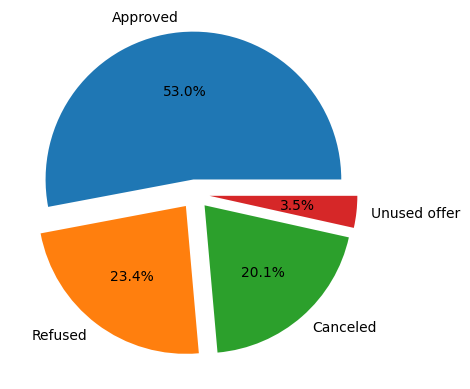

In [38]:
plt.pie(value, labels=label, data = s, autopct ='%.1f%%', radius=1, explode=[0.1,0.1,0.1,0.1])
plt.show()

# Find Percentage of Male and Female Loan Applicatants

In [39]:
ndf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP


In [40]:
ndf['CODE_GENDER'].value_counts()

# Here there is an Unknown value XNA we have to replace with Majority CODE_GENDER i.e, F  

CODE_GENDER
F      349491
M      171829
XNA        15
Name: count, dtype: int64

In [41]:
# Here we replace XNA with F

ndf['CODE_GENDER'] = ndf['CODE_GENDER'].str.replace('XNA','F')

ndf['CODE_GENDER'].value_counts()

CODE_GENDER
F    349506
M    171829
Name: count, dtype: int64

In [42]:
s = ndf['CODE_GENDER'].value_counts() 
print(s)

label = list(s.index)              # index parameter
print(label)

values = list(s.values)            # value parameter
print(values)

CODE_GENDER
F    349506
M    171829
Name: count, dtype: int64
['F', 'M']
[349506, 171829]


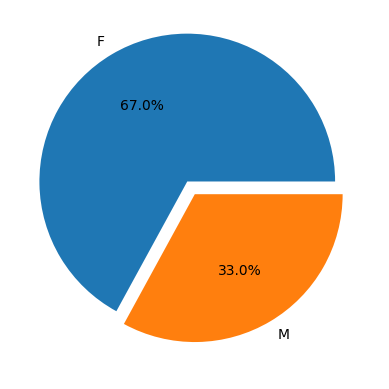

In [43]:
plt.pie(values, labels = label, data = s, autopct='%.1f%%', explode=[0.1,0])
plt.show()

# Create new column named: AMT_Income_Range and store the range of the incomes

In [44]:
ndf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP


In [45]:
# Find Minimum income in 'AMT_INCOME_TOTAL' column.

ndf['AMT_INCOME_TOTAL'].min()

25650.0

In [46]:
# Find Maximum income in 'AMT_INCOME_TOTAL' column.

ndf['AMT_INCOME_TOTAL'].max()

337050.0

In [47]:
def income_range(v):
    if (v> 25000 and v<=50000):
        return '25000-50000'
    
    elif (v> 50000 and v<=75000):
        return '50000-750000'
    
    elif (v> 75000 and v<=100000):
        return '75000-100000'
    
    elif (v> 100000 and v<=125000):
        return '100000-125000'
    
    elif (v> 150000 and v<=175000):
        return '150000-175000'
    
    elif (v> 175000 and v<=200000):
        return '175000-200000'
    
    elif (v> 200000 and v<=225000):
        return '200000-225000'
    
    elif (v> 225000 and v<=250000):
        return '225000-250000'
    
    elif (v> 250000 and v<=275000):
        return '250000-275000'
    
    elif (v> 275000 and v<=300000):
        return '275000-300000'
    
    elif (v> 300000 and v<=325000):
        return '300000-325000'
    
    else:
        return '325000-350000'

In [48]:
ndf['AMT_INCOME_RANGE'] = ndf['AMT_INCOME_TOTAL'].apply(income_range)

In [49]:
ndf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP,250000-275000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP,50000-750000
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP,325000-350000
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP,325000-350000


In [50]:
# Convert the column names from Uppercase to Lowercase.

columns = list(ndf.columns)
new_columns = []
for col in columns:
    new_columns.append(col.lower())
    
ndf.columns = new_columns 
ndf = ndf[ndf.columns]
ndf

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,name_income_type,name_education_type,name_family_status,name_housing_type,organization_type,name_contract_status,code_reject_reason,amt_income_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP,250000-275000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP,50000-750000
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP,325000-350000
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP,325000-350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339273,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,XNA,Approved,XAP,50000-750000
1339274,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,School,Approved,XAP,150000-175000
1339276,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 1,Approved,XAP,150000-175000
1339278,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Commercial associate,Higher education,Married,House / apartment,Business Entity Type 3,Approved,XAP,150000-175000


# Find How many Female and Male got the Loan Applicant Approved, refused, Canceled and Unused offer by using ndf dataset after merging.

In [51]:
ndf.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,name_income_type,name_education_type,name_family_status,name_housing_type,organization_type,name_contract_status,code_reject_reason,amt_income_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP,250000-275000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP,50000-750000
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP,325000-350000
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP,325000-350000


In [52]:
cdf = ndf.groupby(['code_gender', 'name_contract_status']).agg(Count=('name_contract_status','count')).reset_index()
cdf

,code_gender,name_contract_status,Count
0,F,Approved,185288
1,F,Canceled,72054
2,F,Refused,80651
3,F,Unused offer,11513
4,M,Approved,90851
5,M,Canceled,32842
6,M,Refused,41502
7,M,Unused offer,6634


# Barplot: on cdf

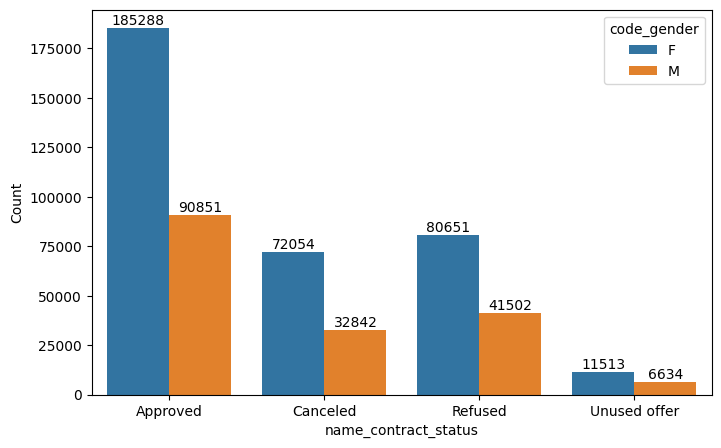

In [53]:
plt.figure(figsize=(8,5))

ax = sns.barplot(x='name_contract_status', y='Count', data=cdf, hue='code_gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [54]:
ndf.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,name_income_type,name_education_type,name_family_status,name_housing_type,organization_type,name_contract_status,code_reject_reason,amt_income_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP,250000-275000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP,50000-750000
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP,325000-350000
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP,325000-350000


# Count of Each name_contract_type of Each name_education_type.

In [55]:
ndf.groupby(['name_education_type', 'name_contract_type']).agg(Count=('name_education_type','count'))

Count
name_education_type           name_contract_type        
Academic degree               Cash loans             181
                              Revolving loans         18
Higher education              Cash loans          101844
                              Revolving loans      11665
Incomplete higher             Cash loans           15387
                              Revolving loans       1883
Lower secondary               Cash loans            6300
                              Revolving loans        345
Secondary / secondary special Cash loans          353694
                              Revolving loans      30018

In [56]:
ed_loan = ndf.groupby(['name_education_type', 'name_contract_type']).agg(Count=('name_education_type','count')).reset_index()
ed_loan

,name_education_type,name_contract_type,Count
0,Academic degree,Cash loans,181
1,Academic degree,Revolving loans,18
2,Higher education,Cash loans,101844
3,Higher education,Revolving loans,11665
4,Incomplete higher,Cash loans,15387
5,Incomplete higher,Revolving loans,1883
6,Lower secondary,Cash loans,6300
7,Lower secondary,Revolving loans,345
8,Secondary / secondary special,Cash loans,353694
9,Secondary / secondary special,Revolving loans,30018


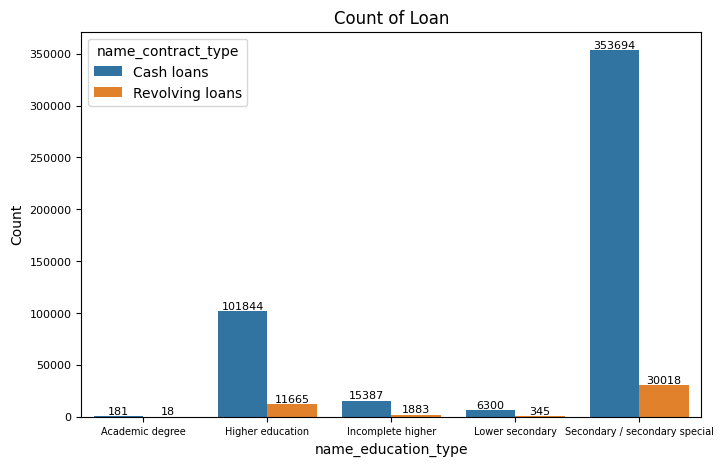

In [57]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='name_education_type', y='Count', data=ed_loan, hue='name_contract_type')

for bars in ax.containers:
    ax.bar_label(bars, size=8)
plt.title('Count of Loan')
plt.xticks(size=7)
plt.yticks(size=8)
plt.show()

In [58]:
ndf.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,name_income_type,name_education_type,name_family_status,name_housing_type,organization_type,name_contract_status,code_reject_reason,amt_income_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP,250000-275000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP,50000-750000
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP,325000-350000
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP,325000-350000


# Credit Amount Loan according to Client's children.

In [59]:
ndf['amt_credit'].unique()

array([ 406597.5, 1293502.5,  135000. , ...,  181989. ,  743863.5,
       1391130. ])

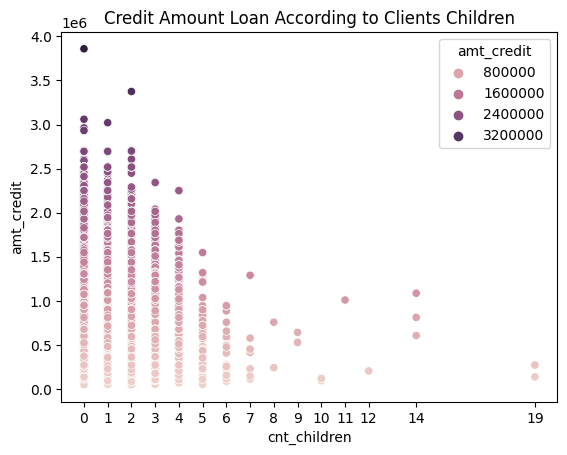

In [60]:
for_x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,14,19])
sns.scatterplot(x='cnt_children', y='amt_credit', hue='amt_credit', data=ndf)
plt.xticks(for_x)
plt.title('Credit Amount Loan According to Clients Children')
plt.show()

In [61]:
ndf.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,name_income_type,name_education_type,name_family_status,name_housing_type,organization_type,name_contract_status,code_reject_reason,amt_income_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,Approved,XAP,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,School,Approved,XAP,250000-275000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,Government,Approved,XAP,50000-750000
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Approved,XAP,325000-350000
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,Canceled,XAP,325000-350000


In [62]:
ndf['name_income_type'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Maternity leave'], dtype=object)

# Income total according to income type

<Axes: xlabel='name_income_type', ylabel='amt_income_total'>

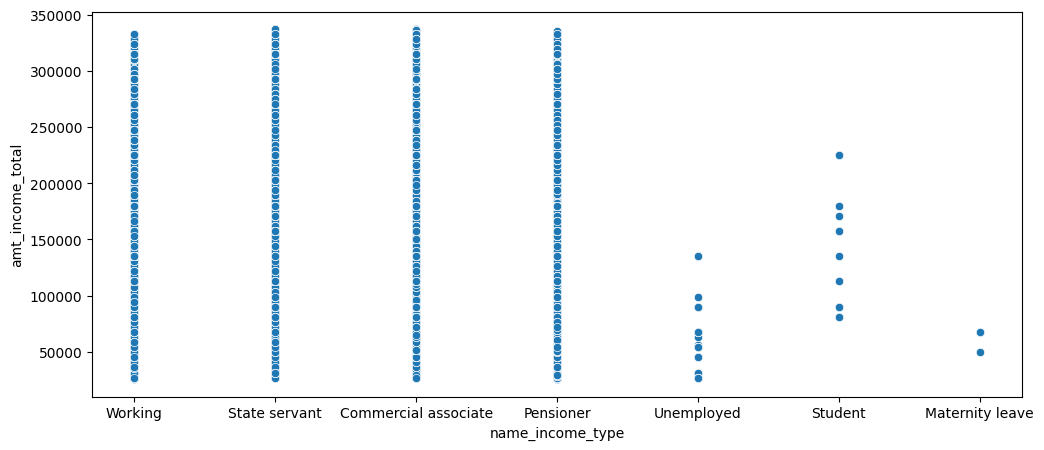

In [63]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='name_income_type', y='amt_income_total', data=ndf)